# Natural Language Processing with TensorFlow

Goal is to derive information from natural language (text or speech).
- Examples of natural language processing (NLP) and natural language problems (NLU):
  - Clssification
  - Text Generation
  - Machine Translation
  - Voice Assistants

Steps:
- Text -> Turn into numbers -> Build model -> Train model to find patterns -> Use patterns (make predictions)




What we're going to cover:
- Download text dataset
- Visualize text data
- Convert text into numbers using tokenization
- Turn tokenized text into an embedding
- Modelling a text dataset
  - Start with baseline (TF-IDF)
  - Build serveral deep learning text models
  - Dense, LSTM, GRU, Conv1D, Transfer Learning
- Compare performance of each models
- Combine model into an emsemble
- Saving and loading a trained model
- Find the most wrng predictions

# Check for GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b8ea9b01-d464-4692-5e27-5f2a1a731d04)


# Get helper functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-11 01:31:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-11 01:31:38 (87.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Download the text dataset

Dataset Info: [Real or Not?](https://www.kaggle.com/c/nlp-getting-started/data) dataset from Kaggle which contains text-based Tweets about natural disasters

Example of Real Disaster Tweet:
- "Jetstar and Virgin forced to cancel Bali flights again because of ash from Mount Raung volcano"

Example of NOT Real Disaster Tweet (could be anything):
- "'Education is the most powerful weapon which you can use to change the world.' Nelson #Mandela #quote"

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-03-11 01:31:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-03-11 01:31:41 (90.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualizing text dataset

In [ ]:
# Turn .csv file into pandas DataFrame

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) 

train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


Inputs (text column) -> Machine Learning Algorithm -> Outputs (target column)

In [ ]:
# The TEST data doesn't have a target column (our goal is to predict this column)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

We have two different values (0 - not disaster, 1 - real disaster) so we're dealing with binary classification

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:
# Visualize random training samples in batches of 5

import random

random_index = random.randint(0, len(train_df)-5) # Get single index that is not higher than total number of samples
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 1 (real disaster)
Text:
the pastor was not in the scene of the accident......who was the owner of the range rover ?

-----

Target: 1 (real disaster)
Text:
The shooting or the airplane accident  https://t.co/iECc1JDOub

-----

Target: 1 (real disaster)
Text:
@Eazzy_P we will never know what would have happened but the govt seemed to think that their beliefs warranted the deaths of innocent japs

-----

Target: 1 (real disaster)
Text:
Happy no one was hurt when #wmata train derailed. Also the express bus is so much better than metro rail http://t.co/7cEhNV3DKy @fox5newsdc

-----

Target: 0 (not real disaster)
Text:
Yessum I'm traumatised ??

-----



# Split data into training and validation sets


Since test set has no labels and we need a way to evaluate the trained model, we'll split training data and create validation set.

Train model on training set and see how it performs on unseen data using validation set using Scikit-Learn's train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training text sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Converting text into numbers

Two main concepts in NLP for turning text into numbers:
- Tokenization - A straight mapping from word to character or sub-word into numerical value. Three main levels of tokenization:
  - **Word-level tokenization** with the sentence "I love TensorFlow" might result in "I" being 0, "love" being 1 and "TensorFlow" being 2. In this case, every **word** in a sequence considered a **single token**.
  - **Character-level tokenization**, such as converting the letters A-Z to values 1-26. In this case, every **character** in a sequence considered a **single token**.
  - **Sub-word tokenization** is in between word-level and character-level tokenization. It involves breaking invidual words into smaller parts and then converting those smaller parts into numbers. For example, "my favourite food is pineapple pizza" might become "my, fav, avour, rite, fo, oo, od, is, pin, ine, app, le, piz, za". After doing this, these sub-words would then be mapped to a numerical value. In this case, every **word** could be considered **multiple tokens**.

- **Embeddings** - An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. For example, the word "dance" could be represented by the 5-dimensional vector [-0.8547, 0.4559, -0.3332, 0.9877, 0.1112]. It's important to note here, the size of the feature vector is tuneable. There are two ways to use embeddings:
  - **Create your own embedding** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
  - **Reuse a pre-learned embedding** - Many pre-trained embeddings exist online. These pre-trained embeddings have often been learned on large corpuses of text (such as all of Wikipedia) and thus have a good underlying representation of natural language. You can use a pre-trained embedding to initialize your model and fine-tune it to your own specific task.

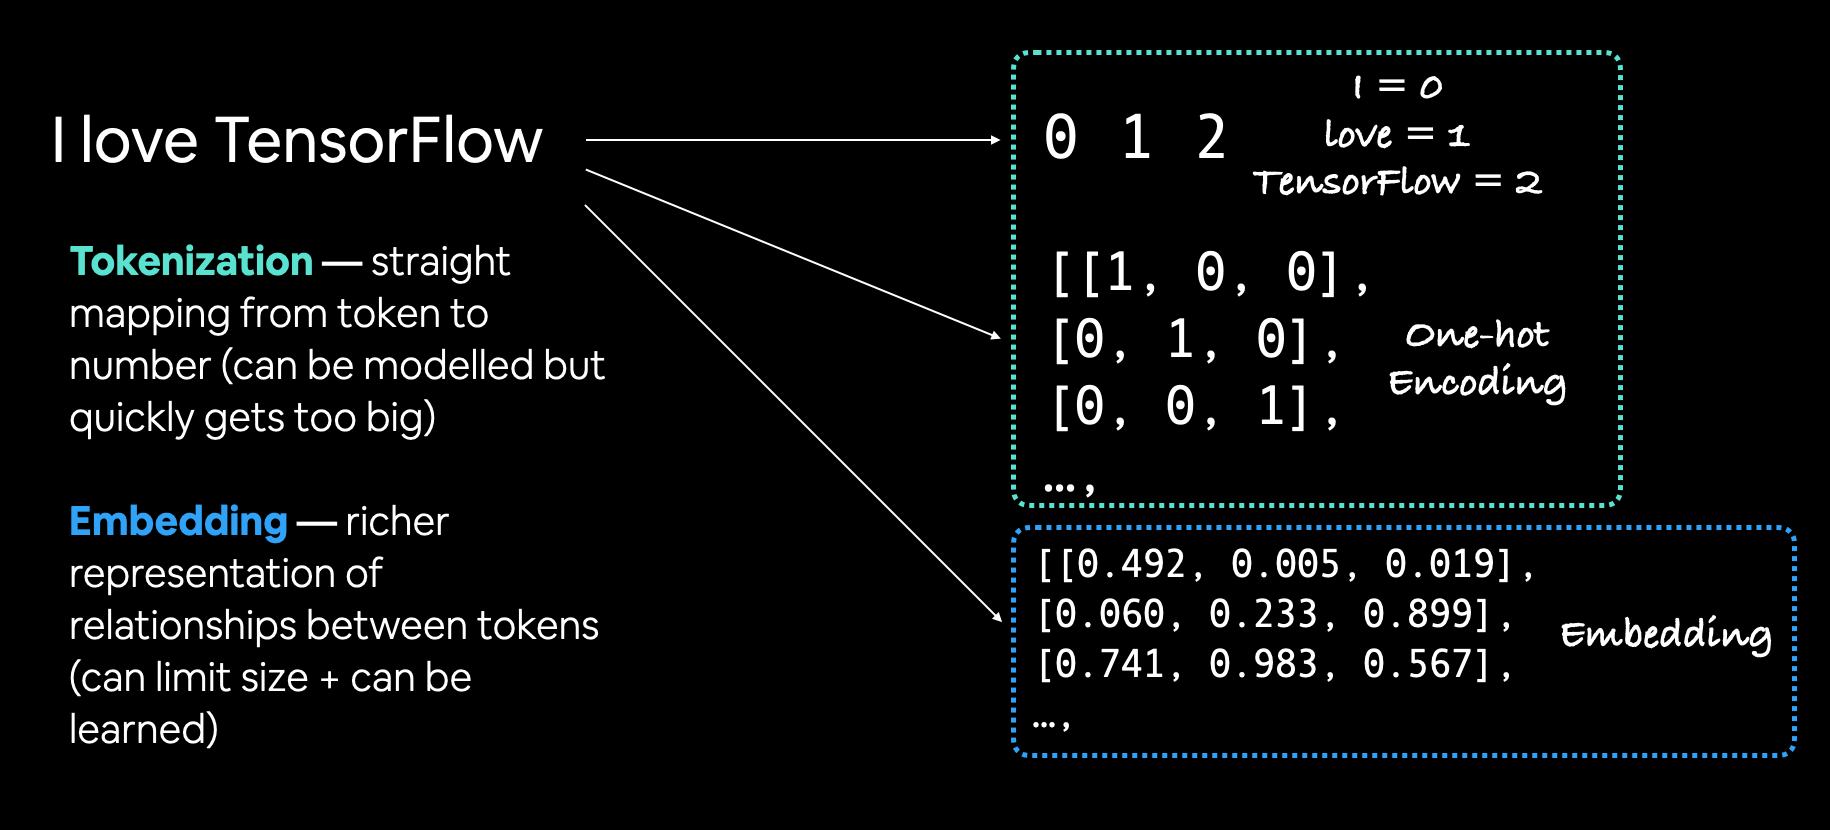

# Text Vectorization (tokenization)

* Mapping words to numbers

To tokenize our words, we'll use the helpful preprocessing layer:
tf.keraslayers.experimental.preprocessing.TextVectorization

TextVectorization has the following parameters:
- **max_tokens** - the max number of words in your vocabulary (20000 or number of unique words in the text), includes value for out of vocabulary (OOV) token
- standardize - method for standardizing text. Default is '**lower_and_strip_punctuation**', which turn text into lowercase and removes all punctuations
- **split** - how we want to split text, default is 'whitespace' which splits on spaces
-  **ngrams** - how many words per token split. ngrams=2 splits token into continuous sequences of 2
- **output_mode** - how to output tokens. Can be 'int' (integer mapping), 'binary' (one-hot encoding), 'count' or 'tf-idf'
- **output_sequence_length** - length of teokenized sequence to output. For example, if output_sequence_length=150, all tokenized sequences will be 150 tokens long
- **pad_to_max_tokens** - defaults to False. If True, the output feature axis will be padded to max_tokens even if the number of unique tokens in the vocvabulary is less than max_tokens. Only valid in certain modes

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # process the text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization with custom variables

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

The 0's at the end of the returned tensor, this is because we set output_sequence_length=15, meaning no matter the size of the sequence we pass to text_vectorizer, it always returns a sequence with a length of 15.

In [ ]:
# Try text_vectorizer on random sentences

# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}")
print("\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Rescue of the day: ItÛªs World Cat Day Saturday Aug 8th Black Black/White Cats just $5 http://t.co/oqb7DaSMVy #NewBeginningsAnimalRescue

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 389,    6,    2,  101, 1829,  107, 1427,  101, 1601,  795, 6299,
         159,    1, 3122,   29]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Creating an Embedding using an Embedding Layer

The powerful thing about an embedding is it can be learned during training. This means rather than just being static (e.g. 1 = I, 2 = love, 3 = TensorFlow), a word's numeric representation can be improved as a model goes through data samples.

Using tf.keras.layers.Embedding layer with parameters:
- input_dim - size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary())
- output_dim - size of the output embedding vectory (a value of 100 outputs a feature vector of size 100 for each word)
- embeddings_initializer - how to initalize the embeddings matrix, default is 'uniform' which randomly initalizes embedding matrix with uniform distribution
- input_length - length of sequences being passed to embedding layer

In [ ]:
tf.random.set_seed(42)

from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer='uniform', # default, initlize randomly
                             input_length=max_length, # set length of each input
                             name='embedding_1')

embedding

In [ ]:
# Get random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original Text:\n{random_sentence}")
print("\nEmbedded Version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
I hope you fall off a cliff

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04103336, -0.01640569,  0.00574566, ...,  0.03157944,
         -0.01967673,  0.02831472],
        [-0.01371578,  0.01037283, -0.0083914 , ..., -0.01023718,
         -0.04569119, -0.03872215],
        [ 0.04263156,  0.02586242, -0.04443915, ...,  0.00462294,
         -0.04120865,  0.03633659],
        ...,
        [ 0.00110061, -0.03142865, -0.0472449 , ..., -0.03238927,
          0.03456515, -0.00085422],
        [ 0.00110061, -0.03142865, -0.0472449 , ..., -0.03238927,
          0.03456515, -0.00085422],
        [ 0.00110061, -0.03142865, -0.0472449 , ..., -0.03238927,
          0.03456515, -0.00085422]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.04103336, -0.01640569,  0.00574566,  0.04370384,  0.00623636,
       -0.03014178,  0.02959466,  0.01687719,  0.00375198,  0.03016329,
        0.01045568,  0.03721381,  0.03307918,  0.01948922,  0.03441486,
        0.02514229, -0.04128275, -0.02581101, -0.0014215 ,  0.01220934,
       -0.03073773,  0.02843075, -0.04094055, -0.0177065 ,  0.0489924 ,
        0.01083765,  0.03249446, -0.00369344,  0.00498511, -0.01298587,
       -0.04364786, -0.04029129, -0.01738679, -0.03474847, -0.02219129,
       -0.04189867, -0.00998266, -0.03331019,  0.04205698,  0.01414986,
       -0.03787477,  0.01479467, -0.0110325 ,  0.02383847,  0.03592349,
       -0.02848831, -0.02614238,  0.02996418, -0.04769492,  0.02100209,
       -0.0480875 ,  0.04300192,  0.0169195 ,  0.02907591, -0.0162432 ,
       -0.01261894,  0.00563883,  0.02801472,  0.02295286, -0.03253563,
        0.00715225,  0.00578561, -0.04546499, -0.04261115, -0.02570205,
       -0.007538

# Modelling a text dataset

Will be building the following models:

- Model 0: Naive Bayes (baseline)
- Model 1: Feed-forward neural network (dense model)
- Model 2: LSTM model
- Model 3: GRU model
- Model 4: Bidirectional-LSTM model
- Model 5: 1D Convolutional Neural Network
- Model 6: TensorFlow Hub Pretrained Feature Extractor
- Model 7: Same as #6 but with only 10% of training data

Steps for each model:
1. Construct the model
2. Train the model
3. Make prediction with model
4. Track prediction evaluation metrics for later comparison

# Model 0 - Baseline

Benchmark for future experiment to improve upon.

Using TF-IDF (Term frequency-inverse document frequency) formula to convert words into numbers and then model them with the Multinominal Naive Bayes algorithm. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()), # convert words to number using tfidf
    ('clf', MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate model and find baseline metrics
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions with baseline model
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating an evaluation function for our model experiments

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1 - Simple dense model
- Single layer model
  - Take text as input
  - Tokenize text 
  - Create embedding
  - Find average of embedding (using Global Average Pooling)
  - Pass the average through fully connected layer with sigmoid activation function

In [ ]:
# Create tensorboard callback to track results (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with Functional API

from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string') # input consist of 1-dimensional strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create embedding of numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower dimensionality of the embedding
outputs = layers.Dense(1, activation='sigmoid')(x) # create output layer, using sigmoid acitivation since we're looking for binary oupuut
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense') # construct the model

In [ ]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

Earlier, we created an embedding of size 128 (output_dim=128) for a vocabulary of size 10,000 (input_dim=10000), hence 1,280,000 trainable parameters.

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230311-013144
Epoch 1/5
215/215 [==============================] - 17s 48ms/step - loss: 0.6109 - accuracy: 0.6930 - val_loss: 0.5375 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4421 - accuracy: 0.8202 - val_loss: 0.4697 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3470 - accuracy: 0.8603 - val_loss: 0.4595 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2854 - accuracy: 0.8921 - val_loss: 0.4645 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2384 - accuracy: 0.9120 - val_loss: 0.4768 - val_accuracy: 0.7861


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7861


[0.47680848836898804, 0.7860892415046692]

In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.01823848, -0.01200925, -0.0349535 , ..., -0.05258809,
          0.05439589, -0.01908756],
        [-0.0381569 ,  0.02717221,  0.04026397, ..., -0.0226392 ,
         -0.0402771 ,  0.00825667],
        [-0.00059621,  0.02905944, -0.00174699, ..., -0.03388616,
          0.06405567, -0.00689092],
        ...,
        [ 0.01662019, -0.03566371,  0.04471388, ...,  0.04758598,
          0.03284648,  0.03781432],
        [ 0.00601653,  0.01127666,  0.07517993, ..., -0.05377894,
          0.00326244, -0.01344333],
        [-0.06094168,  0.02889675,  0.11631177, ..., -0.11120845,
          0.04717845, -0.1129824 ]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "First deep model on text data" \
#   --description "Trying a dense model with an embedding layer" \
#   --one_shot # exits the uploader when upload has finished

In [ ]:
# View the TensorBoard.dev experiment here: https://tensorboard.dev/experiment/gNmaAlupRF6pRSyGgN9Pxg/

In [ ]:
# Make predictions (in the form of probabilities since using sigmoid activation function)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # Get first 10 probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.40985224],
       [0.74843174],
       [0.9977849 ],
       [0.10875904],
       [0.10331105],
       [0.93593925],
       [0.9134329 ],
       [0.99287534],
       [0.96853954],
       [0.2637537 ]], dtype=float32)

To convert back to prediction classes, use tf.round(). Prediction probabilities below 0.5 will be rounded to 0 and above 0.5 will be rounded to 1

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Use calculate_results() function to compare to ground truths
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)

model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

Compare first deep model (model_1) with baseline model (model_0)


In [ ]:
# Is simple Keras model better than baseline model?

import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))


array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

In [ ]:
# Compare simple Keras model (model_1) with baseline (model_0)
compare_baseline_to_new_results(baseline_results=baseline_results, 
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


# Visualizing learned embeddings


First model (model_1) contained an embedding layer (embedding) which learned a way of representing words as feature vectors by passing over the training data.

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]

print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


Use the Embedding Projector tool to visualize our embedding

To use the Embedding Projector tool, we need two files:

- The embedding vectors (same as embedding weights).
- The meta data of the embedding vectors (the words they represent - our vocabulary).

Right now, we've got of these files as Python objects. To download them to file, we're going to use the code example available on the TensorFlow word embeddings tutorial page.

In [ ]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")


Once you've downloaded the embedding_vectors.tsv and embedding_metadata.tsv by running the above function, you can visualize them using Embedding Vector tool:

1. Go to http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (embedding_vectors.tsv and embedding_metadata.tsv)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"

# Recurrent Neural Networks (RNN's)

Premise of an RNN: use information from past to help you with future. Take input (x) and compute an output (y) based on all previous inputs.

When an RNN looks at a sequence of text (already in numerical form), the patterns it learns are continually updated based on the order of the sequence.

Take two sentences:
- Massive earthquake last week, no?
- No massive earthquake last week.

Both contain exactly the same words but have different meaning. The order of the words determines the meaning.

RNN can be used for number of sequence-based problems:
- **One to one**: one input, one output, (e.g. classification)
- **One to many**: one input, many ouput, (e.g. image captioning - image input, text as output)
- **Many to one**: many inputs, one output, (e.g. text classification - classfying Tweet as real diaster or not real diaster)
- **Many to many**: many inputs, many outputs, (e.g. machine translation - English to Spanish, Speech to Text)

RNN Variants
- Long short-term memory cells (LSTMs)
- Gated Recurrent Units (GRUs)
- Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left)

# Model 2: Long Short-term Memory Cells (LSTM)

Similar structure to model_1:

Input (text) -> Tokenize -> Embedding -> Layers (+ LSTM layer) -> Output (label probability)

**Note**: Will be creating another *embedding layer* for this model to prevent reusing trained embeddings (prevent data leakage between models). Can reuse the *text_vectorizer layer* since it doesn't get updated during training.

In [ ]:
# Set random seed and create embedding layer 

from tensorflow.keras import layers

tf.random.set_seed(42)
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)

# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)

# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230311-013228
Epoch 1/5
215/215 [==============================] - 12s 36ms/step - loss: 0.5089 - accuracy: 0.7447 - val_loss: 0.4560 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3167 - accuracy: 0.8713 - val_loss: 0.5124 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2188 - accuracy: 0.9165 - val_loss: 0.5862 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1525 - accuracy: 0.9460 - val_loss: 0.6300 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1057 - accuracy: 0.9603 - val_loss: 0.8910 - val_accuracy: 0.7533


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10 predictions

24/24 [==============================] - 0s 3ms/step


((762, 1), array([[0.03209433],
        [0.74889463],
        [0.99920887],
        [0.05804041],
        [0.00405108],
        [0.9995328 ],
        [0.9371083 ],
        [0.9997116 ],
        [0.9994881 ],
        [0.26522827]], dtype=float32))

Turn prediction probabilities into prediction classes by rounding to the nearest integer 

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

Use calculate_results() function to evaluate LSTM model

Use compare_baseline_to_new_results() function to compare it to baseline model

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)

model_2_results

{'accuracy': 75.32808398950131,
 'precision': 0.7532724967249331,
 'recall': 0.7532808398950132,
 'f1': 0.7519259238014133}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 75.33, Difference: -3.94
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.03


# Model 3: Gated Recurrent Unit (GRU)

GRU layer has similar features to that of LSTM layer but with less parameters

Architecture similar to previous models:

Input (text) -> Tokenize -> Embedding -> Layers (+GRU Layer) -> Output (label probability)

In [ ]:
# Set random seed and create embedding layer
from tensorflow.keras import layers

tf.random.set_seed(42)

model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_3')

# Build an RNN using the GRU layer
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)

# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 

# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the GRU model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230311-013312
Epoch 1/5
215/215 [==============================] - 10s 37ms/step - loss: 0.5204 - accuracy: 0.7365 - val_loss: 0.4541 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3168 - accuracy: 0.8742 - val_loss: 0.4964 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2189 - accuracy: 0.9183 - val_loss: 0.5665 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1616 - accuracy: 0.9422 - val_loss: 0.6116 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1239 - accuracy: 0.9566 - val_loss: 0.6138 - val_accuracy: 0.7703


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1), array([[0.26678908],
        [0.84260666],
        [0.99702245],
        [0.12396857],
        [0.01037136],
        [0.992257  ],
        [0.6497923 ],
        [0.99799216],
        [0.9976672 ],
        [0.5193843 ]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)

model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7702878929185921,
 'recall': 0.7703412073490814,
 'f1': 0.769333028556703}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model 4: Bidirectional RNN Model

A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

For example, rereading a sentence to get better understanding of text.

Improvement trade-off is longer training times and increased model parameters (since model goes left to right and right to left, the number of trainable parameters doubles).

In [ ]:
# Set random seed and create embedding layer
from tensorflow.keras import layers

tf.random.set_seed(42)

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)

# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer

outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230311-013335
Epoch 1/5
215/215 [==============================] - 13s 40ms/step - loss: 0.5134 - accuracy: 0.7447 - val_loss: 0.4590 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3158 - accuracy: 0.8717 - val_loss: 0.5165 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2133 - accuracy: 0.9184 - val_loss: 0.5664 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1482 - accuracy: 0.9495 - val_loss: 0.6551 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1051 - accuracy: 0.9642 - val_loss: 0.6805 - val_accuracy: 0.7677


In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.03139375],
       [0.8642959 ],
       [0.99840623],
       [0.20452482],
       [0.00421727],
       [0.992228  ],
       [0.730115  ],
       [0.9994753 ],
       [0.99945563],
       [0.2876302 ]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 76.77165354330708,
 'precision': 0.7673361969954392,
 'recall': 0.7677165354330708,
 'f1': 0.7673012257670172}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 76.77, Difference: -2.49
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Convolutional Neural Networks for Text

Aside from images, CNNs can also be used for sequences. The difference is that images come in 2-dimensions whereas sequences are usually 1-dimension.

Typical CNN archiecture:
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
- Instead of LSTRM or GRU layer, use tensorflow.keras.layers.Conv1D() layer followed by tensorflow.keras.layers.GlobalMaxPool1D() layer.

CNNs classify text through the following steps:
1. 1-dimensional convolving filters used as ngram detectors
2. Max-pooling over time extracts the relevant ngrams for making decision
3. Rest of the network classifies the text based on this information

# Model 5: Conv1D

In [ ]:
# Set random seed and create embedding layer 
tf.random.set_seed(42)

from tensorflow.keras import layers

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")


# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)

x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)

# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")


# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230311-013400
Epoch 1/5
215/215 [==============================] - 13s 36ms/step - loss: 0.5639 - accuracy: 0.7208 - val_loss: 0.4738 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3427 - accuracy: 0.8594 - val_loss: 0.4760 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2154 - accuracy: 0.9221 - val_loss: 0.5355 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1393 - accuracy: 0.9545 - val_loss: 0.6213 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1000 - accuracy: 0.9675 - val_loss: 0.6681 - val_accuracy: 0.7887


In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.36238787],
       [0.8050988 ],
       [0.9999114 ],
       [0.0275558 ],
       [0.00485579],
       [0.9936454 ],
       [0.9630304 ],
       [0.99828726],
       [0.99880564],
       [0.21304011]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 78.87139107611549,
 'precision': 0.7953441303708004,
 'recall': 0.7887139107611548,
 'f1': 0.7852145092095362}

In [ ]:
# Compare model_5 results to baseline 
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 78.87, Difference: -0.39
Baseline precision: 0.81, New precision: 0.80, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.00
Baseline f1: 0.79, New f1: 0.79, Difference: -0.00


# Using Pretrained Embeddings (transfer learning for NLP)

Instead of using our own embedding layer, we're going to replace it with pretrained embedding layer.

Will be using the [Universal Sentence Encoder](https://aclanthology.org/D18-2029.pdf) from [TensorFlow Hub](https://tfhub.dev/google/universal-sentence-encoder/4)

# Model 6: TensorFlow Hub Pretrained Sentence Encoder

Our previous embedding layer - word-level embedding, outputs 128 dimensional vector for each word

Universal Sentence Encoder - whole-sentence embedding, outputs 512 dimensional vector for each sentence

Encoder/Decoder Model:

Input (Sentence) --> Encoder (Embedding Layer) --> Decoder (Dense Layer) --> Outputs

Encoder: converts raw data into numerical representation (feature vector)

Decorder: converts numerical representation into desired output

In [ ]:
# Example of pretrained embedding with universal sentence encoder
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [ ]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer, # Takes sentences as input and encode them into an embedding
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

# Compile model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230311-014045
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5029 - accuracy: 0.7837 - val_loss: 0.4486 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4140 - accuracy: 0.8148 - val_loss: 0.4364 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3993 - accuracy: 0.8215 - val_loss: 0.4317 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3918 - accuracy: 0.8269 - val_loss: 0.4272 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3853 - accuracy: 0.8307 - val_loss: 0.4287 - val_accuracy: 0.8136


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 21ms/step


array([[0.15237048],
       [0.7461706 ],
       [0.9880993 ],
       [0.18515763],
       [0.71685606],
       [0.68722165],
       [0.97914094],
       [0.9763282 ],
       [0.92573094],
       [0.08215361]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8157623872867286,
 'recall': 0.8136482939632546,
 'f1': 0.8121626682144012}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.36, Difference: 2.10
Baseline precision: 0.81, New precision: 0.82, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


# Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

One benefit of using transfer learning models is the ability to get good results with less data

In [ ]:
# One kind of correct way (there are more) to make data subset (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [ ]:
# Check the number of targets in our subset of data (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

Will now clone previous model (model_6) to get same architecture but reset the learned weights

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230311-014731
Epoch 1/5
22/22 [==============================] - 5s 48ms/step - loss: 0.6678 - accuracy: 0.6924 - val_loss: 0.6490 - val_accuracy: 0.6969
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5937 - accuracy: 0.8090 - val_loss: 0.5908 - val_accuracy: 0.7493
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.5168 - accuracy: 0.8251 - val_loss: 0.5387 - val_accuracy: 0.7638
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4538 - accuracy: 0.8382 - val_loss: 0.5072 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4111 - accuracy: 0.8397 - val_loss: 0.4897 - val_accuracy: 0.7848


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 21ms/step


array([[0.25992224],
       [0.79688525],
       [0.8872845 ],
       [0.2685611 ],
       [0.5645675 ],
       [0.8248176 ],
       [0.8153711 ],
       [0.83423233],
       [0.8411421 ],
       [0.10809049]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.4776902887139,
 'precision': 0.7887661817696516,
 'recall': 0.7847769028871391,
 'f1': 0.7820385831619191}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 78.48, Difference: -0.79
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


# Comparing the performance of each of our models

We trained various models and will not compare the performance of against each other.

All the models used the same training data except for model_7 which used only 10% of the training data

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.608924,0.790328,0.786089,0.783297
lstm,75.328084,0.753272,0.753281,0.751926
gru,77.034121,0.770288,0.770341,0.769333
bidirectional,76.771654,0.767336,0.767717,0.767301
conv1d,78.871391,0.795344,0.788714,0.785215
tf_hub_sentence_encoder,81.364829,0.815762,0.813648,0.812163
tf_hub_10_percent_data,78.477690,0.788766,0.784777,0.782039


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

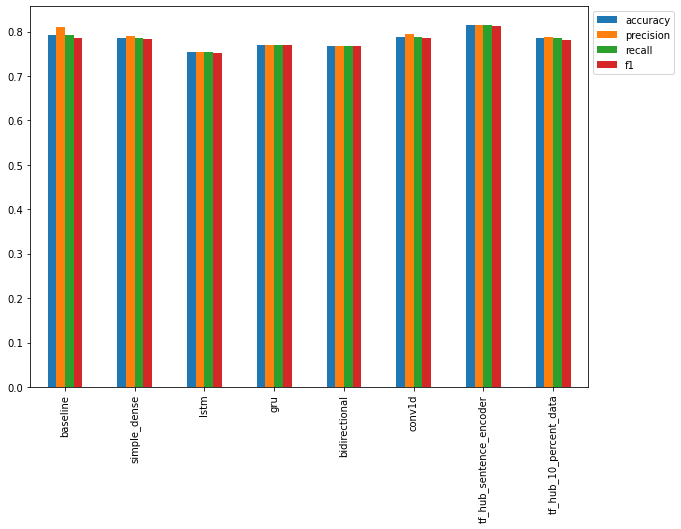

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

Best performing one seems to be the Universal Sentence Encoder from TensorFlow Hub (model_6) 

The model that also uses USE but with 10% of training data (model_7) seems to out perform some of the other models

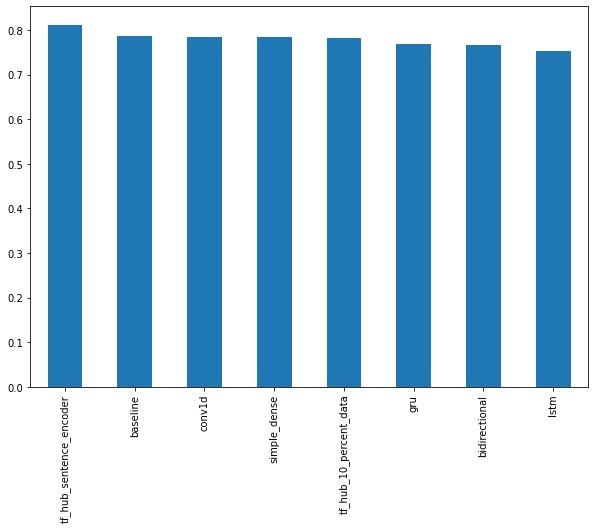

In [ ]:
# View only F1 Score(sorted from high to low)
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)

# # Upload TensorBoard dev records
# !tensorboard dev upload --logdir ./model_logs \
#   --name "NLP modelling experiments" \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

2023-03-11 01:53:45.048718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-11 01:53:45.048836: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-11 01:53:45.048858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard wil

# Combining our models (model ensembling/stacking)

Many production systems use an **ensemble** (multiple different models combined) of models to make a prediction.

The idea behind model stacking is that if several uncorrelated models agree on a prediction, then the prediction must be more robust than a prediction made by a singular model.

The keyword in the sentence above is uncorrelated, which is another way of saying, different types of models. For example, in our case, we might combine our baseline, our bidirectional model and our TensorFlow Hub USE model.

Think of it as trying to decide where to eat with your friends. If you all have similar tastes, you'll probably all pick the same restaurant. But if you've all got different tastes and still end up picking the same restaurant, the restaurant must be good.



### Ways of combining models

1. Averaging - Take the output prediction probabilities of each model for each sample, combine them and then average them.

2. Majority Vote (mode) - Make class predictions with each of your models on all samples, the predicted class is the one in majority. 
  - For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.

3. Model Stacking - Take the ouput of each of your chosen models and use them as input to another model

### What we're going to build


Combine baseline model (model_0), LSTM model (model_3) and USE model (model_6) by averaging the combined prediction probabilities of each

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes

combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.55905511811024,
 'precision': 0.7753808488127285,
 'recall': 0.7755905511811023,
 'f1': 0.7754521478817263}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.790328,0.786089,0.783297
lstm,0.753281,0.753272,0.753281,0.751926
gru,0.770341,0.770288,0.770341,0.769333
bidirectional,0.767717,0.767336,0.767717,0.767301
conv1d,0.788714,0.795344,0.788714,0.785215
tf_hub_sentence_encoder,0.813648,0.815762,0.813648,0.812163
tf_hub_10_percent_data,0.784777,0.788766,0.784777,0.782039
ensemble_results,0.775591,0.775381,0.775591,0.775452


# Saving and loading a trained model

Two main ways to save a model in TensorFlow:
1. HDF5 format
2. SavedModel format (default)

### HDF5 format

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

### SavedModel Format

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4287 - accuracy: 0.8136


[0.4287264049053192, 0.8136482834815979]

# Finding the most wrong examples

 Find the samples the model got most wrong, meaning, what predictions had a high prediction probability but turned out to be wrong

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds, # Best performing model
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.152370
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.746171
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988099
3,@camilacabello97 Internally and externally scr...,1,0.0,0.185158
4,Radiation emergency #preparedness starts with ...,1,1.0,0.716856


In [ ]:
# Find the wrong predictions (where target != pred) and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.904926
759,FedEx will no longer transport bioterror patho...,0,1.0,0.862160
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.842515
628,@noah_anyname That's where the concentration c...,0,1.0,0.840320
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.828434
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.813758
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.796642
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.785459
144,The Sound of Arson,0,1.0,0.770191
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.759123


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.9049258232116699
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8621602654457092
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8425152897834778
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8403202891349792
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8284343481063843
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8137577772140503
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pr

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.0615425631403923
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05836540088057518
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.05819017440080643
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.054131440818309784
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.05393725633621216
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.047552745789289474
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03873808681964874
Text:
Reddit Will Now Q

#### Looks like the ground truths for these False Negatives aren't correct.....

# Making predictions on the test dataset


We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 78ms/step
Pred: 0, Prob: 0.09091482311487198
Text:
Lupe know how to rap about social issues and not be boring.  American Terrorist All Black Everything and Little weapon are good examples

----

1/1 [==============================] - 0s 61ms/step
Pred: 1, Prob: 0.6997971534729004
Text:
@twlldun @peterjukes It's a very good piece. And I agree the failure of post-war planning was the catastrophe.

----

1/1 [==============================] - 0s 65ms/step
Pred: 0, Prob: 0.0411415733397007
Text:
Tonight It's Going To Be Mayhem @ #4PlayThursdays. Everybody Free w/ Text. 1716 I ST NW (18+) http://t.co/iW2OTzQFkH

----

1/1 [==============================] - 0s 69ms/step
Pred: 0, Prob: 0.3763648569583893
Text:
ThorCon: A Thorium Molten Salt Reactor System that can be built Now https://t.co/K90M1qoE9q #thorium #Auspol #climate #nuclearrcSA #nuclear

----

1/1 [==============================] - 0s 60ms/step
Pred: 1, Prob: 0.746320366859436
Text:
#LMÛªs

# Predicting on Tweets from the wild

In [ ]:
# Turn Tweet into string
kevins_tweet = "Listen to understand, not to respond"

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=kevins_tweet)

1/1 [==============================] - 0s 38ms/step
Pred: 0.0 (not real disaster) Prob: 0.13829046487808228
Text:
Listen to understand, not to respond


In [ ]:
# Some examples of disaster tweets

# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [ ]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_1)

1/1 [==============================] - 0s 58ms/step
Pred: 1.0 (real disaster) Prob: 0.9624468684196472
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [ ]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6, 
                    sentence=beirut_tweet_2)

1/1 [==============================] - 0s 143ms/step
Pred: 1.0 (real disaster) Prob: 0.9696242213249207
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


# The speed/score tradeoff

The point here is to illustrate the best model you find through experimentation, might not be the model you end up using in production.

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 11ms/step


(0.34234011199987435, 0.00044926523884497945)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.025784134000332415, 3.383744619466196e-05)


It seems with our current hardware (Google Colab notebook) our best performing model takes over 10x the time to make predictions as our baseline model.

Is that extra prediction time worth it?

Let's compare time per prediction versus our model's F1-scores.

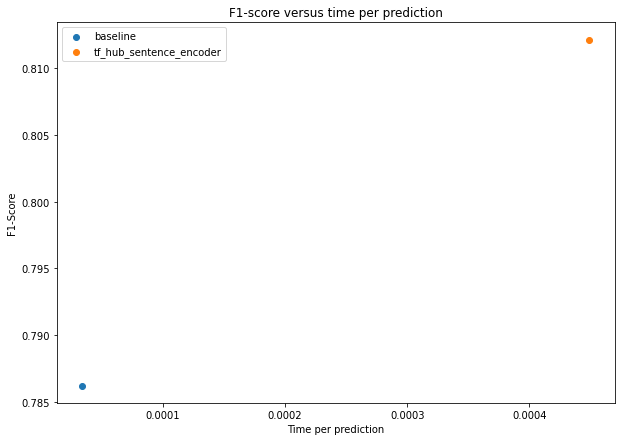

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");

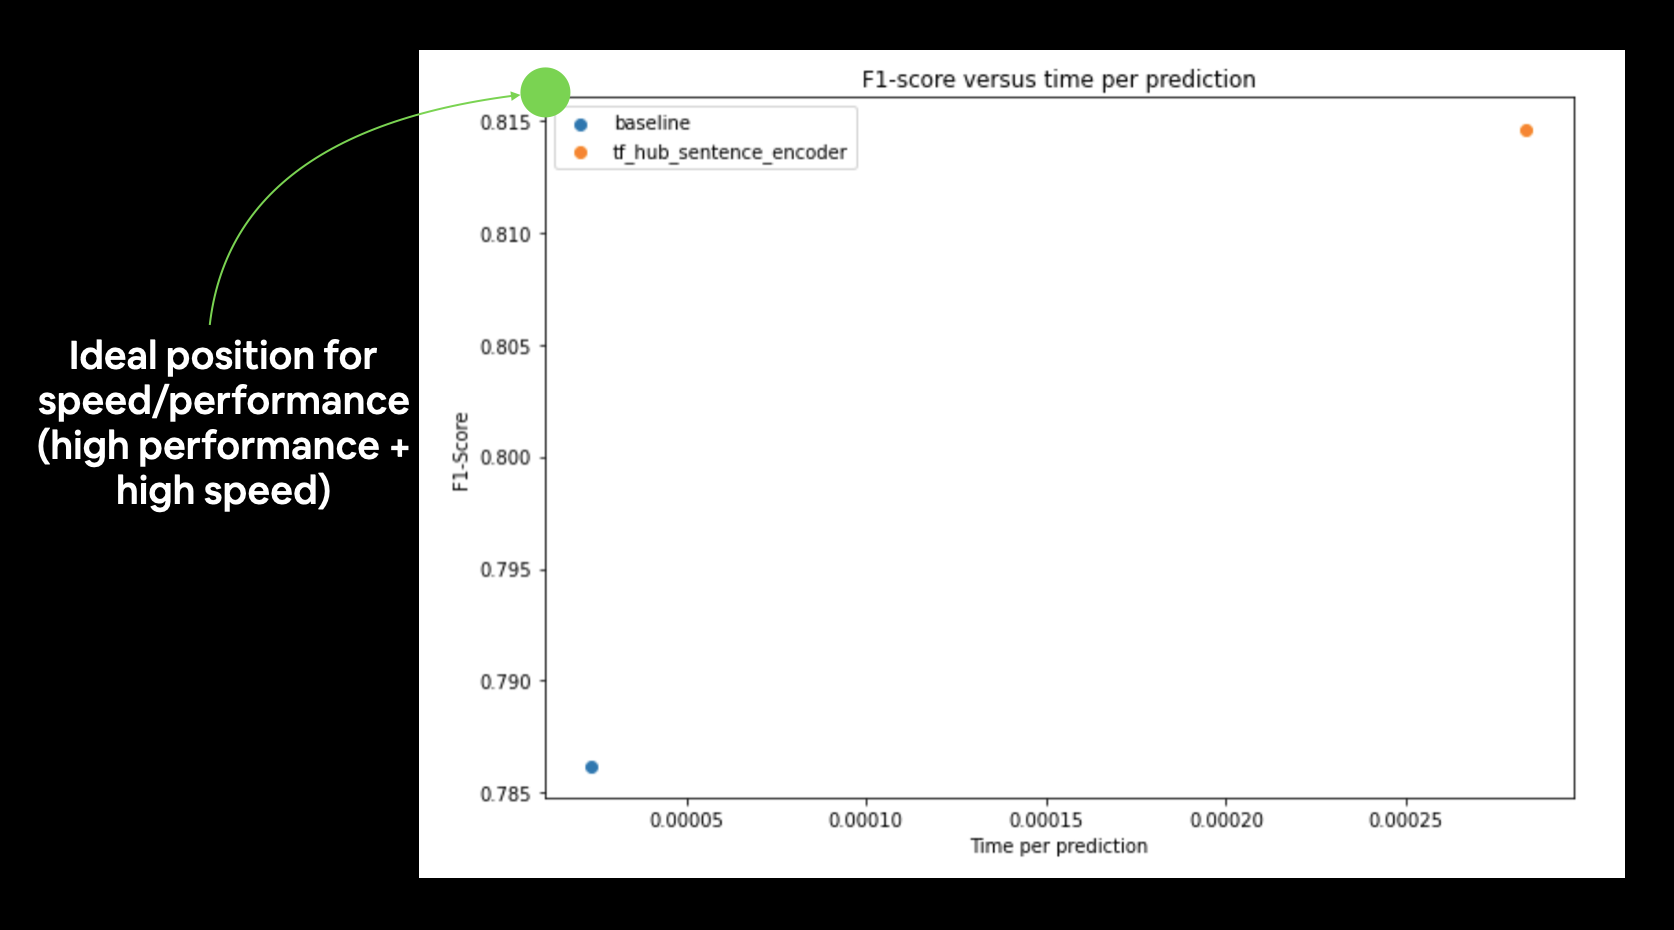

In our case, there's a clear tradeoff for time per prediction and performance. Our best performing model takes an order of magnitude longer per prediction but only results in a few F1-score point increase.